In [1]:
import multipletau as mp

import numpy as np
import pandas as pd
from os.path import join

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

import re

import os
import glob
import sys
homedir = __file__
if homedir not in sys.path:
    sys.path.append(homedir)

## to be modified by the user
inputdir = "path_to_intensity_traces"
##

from modules.FilterResults import smooth, remove_positive_corr, remove_spikes

from modules.ExtractTraces import get_files_list, get_values, get_unique_IDs

#-----------------#


import matplotlib
factor = 0.3
matplotlib.rcParams.update({
        'figure.figsize' : (round(15),round(10)),
        'axes.labelsize' : round(80*factor),
        'axes.titlesize' : round(80*factor),
        'xtick.labelsize' : round(80*factor),
        'ytick.labelsize' : round(80*factor),
        'lines.linewidth' : round(6*factor),
        'lines.markersize' : round(34*factor),
        'legend.fontsize' : round(60*factor),
        'axes.linewidth' : round(10*factor),
        'xtick.major.size': round(20*factor),
        'ytick.major.size': round(20*factor),
        'xtick.major.width': round(8*factor),
        'ytick.major.width': round(8*factor),
        })

/opt/anaconda3/envs/multipletau/lib/python3.8/site-packages/ipykernel_launcher.py/Code/Analysis/


In [2]:
def is_translated(y, thr):
    """
    Parameters
    ----------
    y : 1d array
        green fluorescent track.
    thr : real
        threshold discriminating translation from noise.

    Returns
    -------
    int: how many data points are above threshold.

    """
    ysmoo = smooth(y, w=15, mean=False)
    mask = ysmoo > thr
    return len(ysmoo[mask])

## Estimate noise from untranslated traces for each experiment

In [ ]:
model_name = "gaussian_plane"
spec = "_ff" # traces obtained from flat-field corrected images
nframes = 271
dt = 20 # sec

GreenTraces = []
RedTraces = []

### use traces from multiple experiments acquired on the same day
### to be modified by the user
samples = ["sample_name_1", "sample_name_2",]
date = "date"
####

for sample in samples:
    
    files = get_files_list(date, sample, inputdir, model_name, spec, stage='*')
    try:
        new_files, green_traces, red_traces, mask = get_values(files, nframes)
    except TypeError:
        continue
    GreenTraces.extend(green_traces[mask])
    RedTraces.extend(red_traces[mask])

### select long untranslated traces

In [ ]:
final_green = []
corr_green = []
final_red = []

for n in range(len(GreenTraces)):
        
    y = GreenTraces[n]
    yr = RedTraces[n]
    mask = ~np.isnan(y)
                
    green_corr = remove_spikes(y)
    #print(len(green_corr[mask]))
    #print(green_corr[mask])
    
    if (len(green_corr[mask]) > 30) and not is_translated(green_corr[mask], thr=15): #and np.all(green_corr[mask]>15):
        print(green_corr[mask])
        final_green.append(y) 
        corr_green.append(green_corr)
        final_red.append(yr)

final_green = np.array(final_green)
corr_green = np.array(corr_green)
final_red = np.array(final_red)

### Compute both spike noise and total correlation from autocovariance

119
47.228295772427536
17.931062274159114
19.564810555104216
33.774243789836426
13.650346660354113
18.827570152647606
18.031231289410588
22.0244392128267
23.386126303681767
9.421551499320799
36.48661415749658
18.971355141629665
34.198390411397014
9.540395371098176
18.62694527620315
14.625310305061298
9.14093953486571
7.61933049106346
13.877344492770442
7.068006569314637
15.388693884653183
14.27654570952497
20.21717106214248
12.272644965088134
12.402904968169638
16.05921585055976
13.113462412866692
14.093539487053064
19.885882882386074
46.49084203585216
11.076467983525422
22.362626025823452
25.949783838554225
16.67641130955598
14.773217786527447
35.34699083329017
17.607417215313035
17.68785851411858
16.313516034964053
11.060376816349676
10.795825373082732
35.97136768021986
30.865028928020642
24.39631148944417
18.392720092612418
11.550984559338962
8.572848250891006
12.222699076280469
11.1132886684035
31.430258886823683
42.330741728600124
12.165677254458416
8.67590758831409
24.41109632046

<ipython-input-26-95077e43d1eb>:67: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(np.log(1+m[0]-sm[0])))


Text(-0.1, 1.05, 'B')

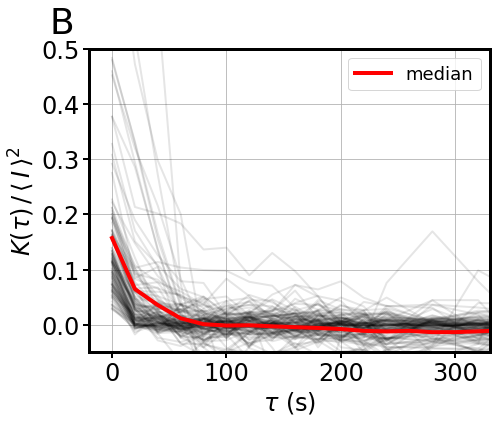

In [26]:
from scipy.stats import linregress


factor = 0.3
matplotlib.rcParams.update({
        'figure.figsize' : (round(15),round(10)),
        'axes.labelsize' : round(80*factor),
        'axes.titlesize' : round(80*factor),
        'xtick.labelsize' : round(80*factor),
        'ytick.labelsize' : round(80*factor),
        'lines.linewidth' : round(6*factor),
        'lines.markersize' : round(34*factor),
        'legend.fontsize' : round(60*factor),
        'axes.linewidth' : round(10*factor),
        'xtick.major.size': round(20*factor),
        'ytick.major.size': round(20*factor),
        'xtick.major.width': round(8*factor),
        'ytick.major.width': round(8*factor),
        })


var_normalized = []

acc = []

time = np.arange(19) * 20

fig, ax = plt.subplots(figsize=(7, 6), tight_layout=True)

print(len(final_green))
for y in corr_green:
    
    y = y[~np.isnan(y)]
    mu = np.mean(y)
    
    x = np.arange(len(y))
    p = linregress(x, y)
       
    y -= mu
    
    res, n = mp.autocorrelate(y, m=12, ret_sum = True)#m=32)ret_sum = True,

    delay = res[:,0] * 20
    ac = res[:, 1] / mu**2 / n

    ax.plot(delay, ac, c = 'k', alpha=0.1)
    acc.append(ac[:19])
    var_normalized.append(ac[0]-ac[1])
ax.grid()



acc = np.array(acc)
m = np.mean(acc, axis=0)
sm = np.std(acc, axis = 0)
print("variance (avg): ", m[0], sm[0])
print(np.sqrt(np.log(1+m[0])))
print(np.sqrt(np.log(1+m[0]+sm[0])))
print(np.sqrt(np.log(1+m[0]-sm[0])))

diff = acc[:, 0] - acc[:, 1]
s = np.std(diff)


print("\n")
ax.plot(time, m, c='r', lw=4, label="median")



v = m[0]-m[1]
print("shot-noise variance (avg): ", v, s)

S = np.zeros(len(m))
S[0] = v


print(np.sqrt(np.log(1+v)))
print(np.sqrt(np.log(1+(v+s))))
print(np.sqrt(np.log(1+(v-s))))

print(np.sqrt(np.log(1+(v+1.5*s))))
print(np.sqrt(np.log(1+(v-1.5*s))))

var_normalized = np.array(var_normalized)

ax.set_xlim(-20,5.5*60)
ax.set_ylim(-0.05,0.5)
ax.set_xlabel(r"$\tau$ (s)")
ax.set_ylabel(r"$K(\tau) \, / \, \langle \, I \, \rangle^2$")
ax.legend(loc="upper right")
#print(res[:5,1])

ax.text(s="B", x=-0.1, y=1.05, fontsize=36, transform=ax.transAxes)